<a href="https://colab.research.google.com/github/vikishan13/Handwritten-Digit-Recognition-using-TensorFlow/blob/main/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Handwritten Digit Recognition

  Certainly! Handwritten digit recognition is a classic problem in machine learning, and TensorFlow makes it relatively straightforward to implement a solution the popular dataset MNIST, which consists of 28x28 pixel grayscale images of handwritten digits (0 through 9).

In [1]:
import tensorflow as tf

***TENSORFLOW***

* TensorFlow is an open-source machine learning library developed by the Google Brain team.
* At its core, TensorFlow allows you to define and train machine learning models through the use of computational graphs.
* It provides a comprehensive set of tools for building and deploying machine learning models, particularly neural networks.
* TensorFlow is widely used for various tasks, including image recognition, natural language processing, and more.
* For handwritten digit recognition, you can leverage TensorFlow's capabilities to build and train neural networks that can learn patterns and features from handwritten digit images.
* The popular "MNIST" dataset, consisting of grayscale images of handwritten digits from 0 to 9, is often used for this type of project within the TensorFlow community.

In [2]:
from tensorflow.keras import layers, models

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
from tensorflow.keras.utils import to_categorical
# to perform one-hot encoding (to turn the image class/label)

In [5]:
(xtrain, ytrain), (xtest, ytest) = mnist.load_data()

In [6]:
xtrain.shape # taking 60000 values for training the model

(60000, 28, 28)

In [7]:
xtest.shape # taking 10000 values for testing the model

(10000, 28, 28)

***Checking the value of data***
  *   The input we are getting is an image, so we should be checking how the data is, and we should confirm that each image size is 28*28 (we should get from the shape -> each image has 28 rows and 28 columns)

In [8]:
xtrain[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

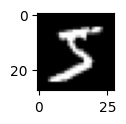

The number in the image is 5


In [9]:
import matplotlib.pyplot as plt
index = 0 # to check what the training image 0 has (changing index will generate the image in 60000 training images)
plt.figure(figsize = (1,1))
plt.imshow(xtrain[index], cmap = 'gray')
plt.show()
print("The number in the image is", ytrain[index])

As we have seen in the xtrain.shape, the image size is 28*28 pixels, each has separate values according to the brightness in the pixel, so let's better normalize/scale for better accuracy

Normalization -> similar range of values

In the MNIST dataset, each pixel in an image represents the intensity of light, and the pixel values are originally in the range of 0 to 255. In grayscale images, 0 corresponds to black, 255 corresponds to white, and values in between represent varying shades of gray.

In [10]:
# to normalize, let's divide the values by 255
xtrain = xtrain.reshape((60000, 28, 28, 1)).astype('float32') / 255
xtest = xtest.reshape((10000, 28, 28, 1)).astype('float32') / 255

In [11]:
# checking xtrain value
xtrain[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

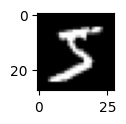

The number in the image is 5


In [12]:
# Let's confirm after normalizing the image by visualizing the image
plt.figure(figsize = (1,1))
plt.imshow(xtrain[index], cmap = 'gray')
plt.show()
print("The number in the image is", ytrain[index])

In [13]:
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

In [14]:
ytrain[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [15]:
from tensorflow.keras.layers import Dense

In [16]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

### ***Hidden Layer (Dense with ReLU Activation)***
The flattened input is then passed through a fully connected layer with 128 neurons. Each neuron in this layer is connected to every pixel in the flattened input. The activation function used here is the Rectified Linear Unit (ReLU). The output of each neuron is calculated as follows:

Output
=
max
⁡
(
0
,
Weighted Sum of Inputs
+
Bias
)

As gradient descent has some disadvantages while using it as optimization function, I'm going with ADAM

In [17]:
# Compile the model
model.compile(optimizer='adam',
              loss= 'categorical_crossentropy',
              metrics=['accuracy'])

In [18]:
# Train the model
history = model.fit(xtrain, ytrain, batch_size = 500, epochs=10, validation_data = (xtest, ytest))

Epoch 1/10
120/120 [==============================] - 36s 294ms/step - loss: 0.4872 - accuracy: 0.8590 - val_loss: 0.1157 - val_accuracy: 0.9661
Epoch 2/10
120/120 [==============================] - 30s 250ms/step - loss: 0.1018 - accuracy: 0.9700 - val_loss: 0.0676 - val_accuracy: 0.9803
Epoch 3/10
120/120 [==============================] - 30s 248ms/step - loss: 0.0657 - accuracy: 0.9803 - val_loss: 0.0482 - val_accuracy: 0.9850
Epoch 4/10
120/120 [==============================] - 29s 240ms/step - loss: 0.0504 - accuracy: 0.9847 - val_loss: 0.0398 - val_accuracy: 0.9888
Epoch 5/10
120/120 [==============================] - 30s 246ms/step - loss: 0.0426 - accuracy: 0.9871 - val_loss: 0.0367 - val_accuracy: 0.9883
Epoch 6/10
120/120 [==============================] - 28s 236ms/step - loss: 0.0342 - accuracy: 0.9898 - val_loss: 0.0294 - val_accuracy: 0.9904
Epoch 7/10
120/120 [==============================] - 29s 241ms/step - loss: 0.0309 - accuracy: 0.9906 - val_loss: 0.0291 - val_ac

In [19]:
import matplotlib.pyplot as plt

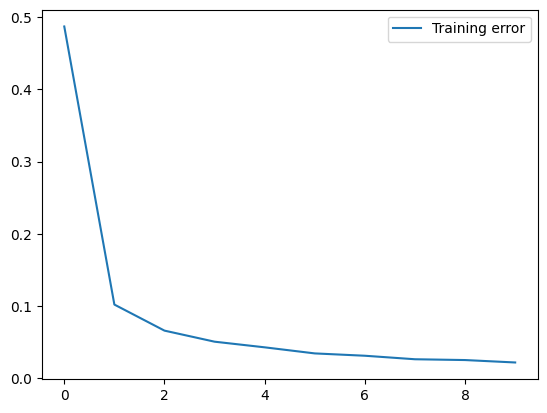

In [20]:
plt.plot(history.history['loss'], label ="Training error")
plt.legend()

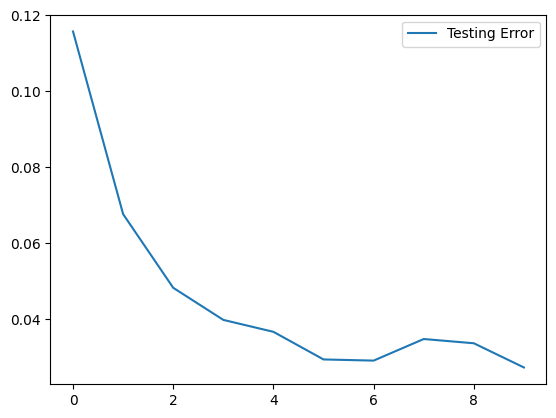

In [21]:
plt.plot(history.history['val_loss'], label ="Testing Error")
plt.legend()

In [22]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f'\nTest accuracy: {test_acc}')

313/313 [==============================] - 2s 6ms/step - loss: 0.0273 - accuracy: 0.9903

Test accuracy: 0.9902999997138977


In [23]:
# Let's go with prediction
from PIL import Image

In [24]:
import numpy as np

In [26]:
# Image1
image_path = '/content/final.jpeg'  # Replace with the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to match the model's input size
image_array = np.array(image).reshape((1, 28, 28, 1)).astype('float32') / 255.0

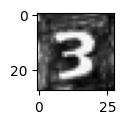

In [27]:
# The image provided by me, which is sketched on my own
image_to_visualize = image_array.squeeze()

plt.figure(figsize=(1, 1))
plt.imshow(image_to_visualize, cmap='gray')
plt.show()

In [28]:
predictions = model.predict(image_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 82ms/step
Predicted class: 3


In [29]:
# Image2
image_path = '/content/Screenshot531.png'  # Replace with the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to match the model's input size
image_array = np.array(image).reshape((1, 28, 28, 1)).astype('float32') / 255.0

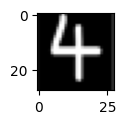

In [30]:
image_to_visualize = image_array.squeeze()

plt.figure(figsize=(1, 1))
plt.imshow(image_to_visualize, cmap='gray')
plt.show()

In [31]:
predictions = model.predict(image_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 16ms/step
Predicted class: 4


In [47]:
# Image3
image_path = '/content/predict_label.jpeg'  # Replace with the path to your image
image = Image.open(image_path).convert('L')  # Convert to grayscale
image = image.resize((28, 28))  # Resize to match the model's input size
image_array = np.array(image).reshape((1, 28, 28, 1)).astype('float32') / 255.0

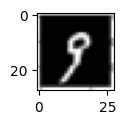

In [48]:
image_to_visualize = image_array.squeeze()

plt.figure(figsize=(1, 1))
plt.imshow(image_to_visualize, cmap='gray')
plt.show()

In [49]:
predictions = model.predict(image_array)

# Get the predicted class
predicted_class = np.argmax(predictions)

print(f'Predicted class: {predicted_class}')

1/1 [==============================] - 0s 17ms/step
Predicted class: 9
